# KNMI Drougt Indices

## Load packages

In [1]:
import hydropandas as hpd
import matplotlib as mpl
import pandas as pd

from spei import knmi
from spei.plot import deficit_knmi
from spei.utils import group_yearly_df

/home/martin/repos/SPEI/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Get data
Data from De Bilt (260) from 1960 till today

In [2]:
prec = hpd.PrecipitationObs.from_knmi(
    meteo_var="RH",
    stn=260,
    startdate=pd.Timestamp("1960-01-01"),
    enddate=pd.Timestamp.today(),
)["RH"].multiply(1e3)
prec.index = prec.index.normalize()
evap = hpd.EvaporationObs.from_knmi(
    meteo_var="EV24",
    stn=260,
    startdate=pd.Timestamp("1960-01-01"),
    enddate=pd.Timestamp.today(),
)["EV24"].multiply(1e3)
evap.index = evap.index.normalize()
temp = hpd.MeteoObs.from_knmi(
    meteo_var="TG",
    stn=260,
    startdate=pd.Timestamp("1960-01-01"),
    enddate=pd.Timestamp.today(),
)["TG"]
temp.index = temp.index.normalize()

## Calculate precipitation deficit

(0.0, 354.26999999999987)

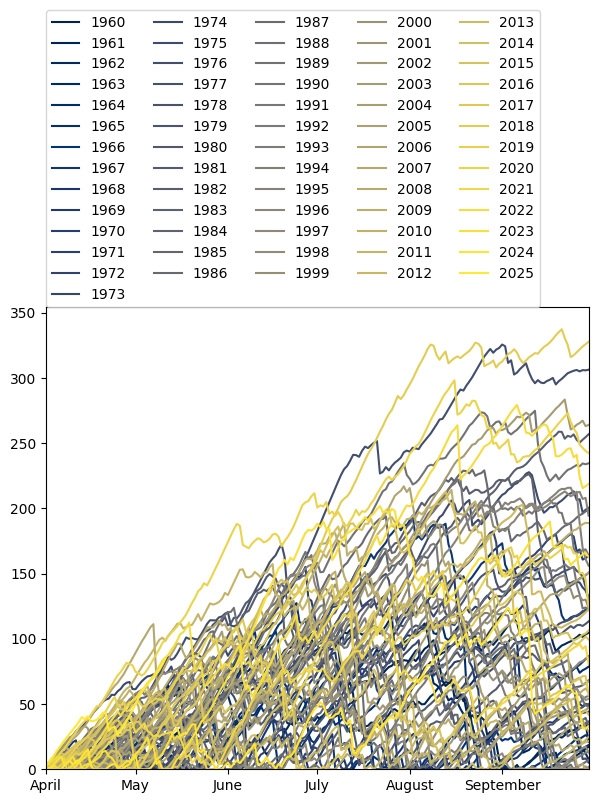

In [3]:
deficit = evap - prec
## deficit period
startdate = pd.Timestamp("2000-04-01")
enddate = pd.Timestamp("2000-09-30")
# calculate cumulative deficit
cumdf = knmi.get_cumulative_deficit(
    deficit=deficit,
    startdate=startdate,
    enddate=enddate,
    allow_below_zero=False,
)
# plot deficit
ax = cumdf.plot(figsize=(7.0, 6.0), cmap="cividis")
ax.legend(ncol=5, loc=(0, 1))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%B"))
ax.xaxis.set_ticks([], minor=True)
ax.set_ylim(0.0)

## Precipitation deficit indices

In [4]:
doct1 = knmi.deficit_oct1(deficit)
doct1.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Doct1,17.2,21.2,104.7,7.6,78.7,24.9,18.6,124.1,0.0,49.3,...,99.5,56.6,327.8,124.3,242.6,80.6,218.8,162.8,32.8,NaN


In [5]:
dmax = knmi.deficit_max(deficit)
dmax.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Dmax,104.8,75.8,116.9,92.1,113.4,49.1,105.9,194.6,43.3,148.2,...,101.7,143.4,337.4,172.1,298.2,119.8,279.3,201.8,123.8,84.8


In [6]:
diapr1 = knmi.deficit_apr1(deficit)
diapr1.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
DIapr1,110.7,75.8,116.9,169.4,113.4,269.6,226.5,194.6,172.6,154.3,...,119.6,142.8,337.4,172.1,295.7,119.8,279.3,201.8,123.8,82.2


In [7]:
digdd = knmi.deficit_gdd(deficit, temp, threshold=440.0)
digdd.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
DIgdd,91.1,33.3,113.0,80.8,93.5,4.4,90.3,126.1,12.9,113.6,...,61.2,145.6,311.9,178.2,293.0,85.9,254.3,135.5,1.0,84.8


In [8]:
diwet = knmi.deficit_wet(deficit)
diwet.to_frame().transpose()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
DIwet,2.4,-1.0,-14.8,29.1,58.5,-15.1,-5.2,50.6,-12.4,0.7,...,-1.1,9.8,172.7,0.3,87.9,-2.6,109.1,-21.1,-2.6,42.9


## Compare to original KNMI data

(0.0, 380.52)

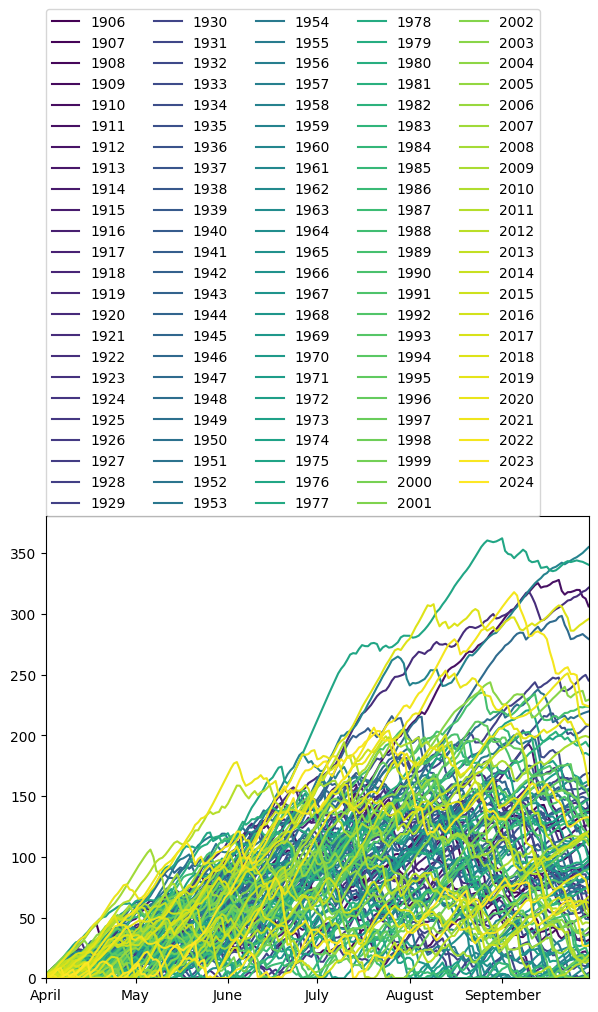

In [9]:
knmi_cumdf = group_yearly_df(
    pd.read_csv(
        "data/neerslagtekort.txt",
        skiprows=11,
        sep="\t",
        header=None,
        index_col=0,
        parse_dates=True,
        date_format="%Y%m%d",
    )
    .dropna(how="all", axis=1)
    .squeeze()
    .rename("KNMI")
)
knmi_cumdf.index.name = ""
ax = knmi_cumdf.plot(figsize=(7.0, 6.0), cmap="viridis")
ax.legend(ncol=5, loc=(0, 1))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%B"))
ax.xaxis.set_ticks([], minor=True)
ax.set_ylim(0.0)

### KNMI plot

From KNMI website

![hoi](https://cdn.knmi.nl/knmi/map/page/klimatologie/grafieken/neerslagtekort/neerslagtekort.png)

With KNMI data. De berekening maakt gebruik van de gemiddelde neerslag van 13 referentiestations in Nederland (de zogenoemde P13 stations) en van de referentieverdamping berekend op basis van de zonneschijnduur in De Bilt (tot 2001) of de globale straling nabij de P13 stations (vanaf 2001). 

De P13 stations zijn: De Bilt, De Kooy, Groningen, Heerde, Hoofddorp, Hoorn, Kerkwerve, Oudenbosch, Roermond, Ter Apel, West-Terschelling, Westdorpe en Winterswijk.



Text(0.5, 1.0, 'KNMI Climate Data')

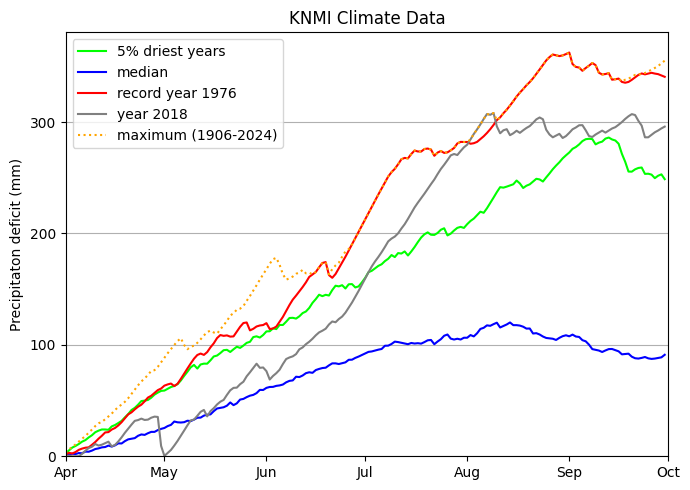

In [10]:
ax = deficit_knmi(knmi_cumdf)
ax.set_title("KNMI Climate Data")

Only for De Bilt station data

Text(0.5, 1.0, 'Only de Bilt')

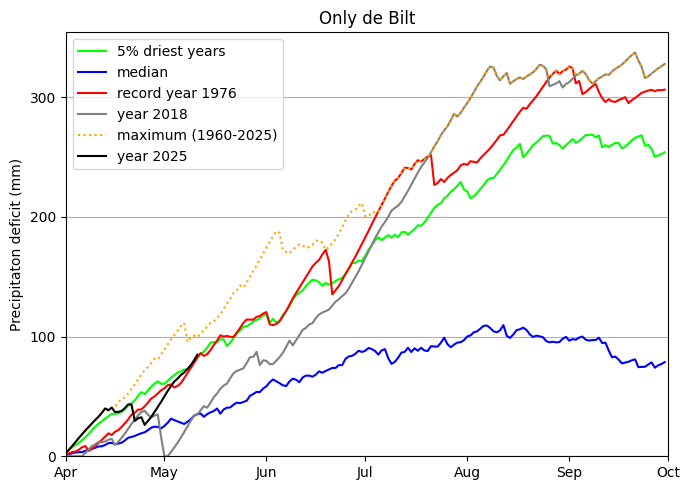

In [11]:
ax = deficit_knmi(cumdf)
ax.set_title("Only de Bilt")